In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['axes.unicode_minus']=False

In [61]:
df = pd.read_csv('对比.csv')
df

,top-1,top-2,top-3,top-4,top-5
0,78.48,84.32,87.57,88.74,89.64
1,78.54,85.30,87.29,87.73,88.09
2,78.08,84.58,86.74,87.47,88.46
3,77.46,84.22,86.20,86.47,87.19
4,78.27,84.13,86.21,87.38,87.83
5,1.17,1.71,2.61,2.88,3.15
6,0.18,0.27,0.27,0.63,0.72
7,0.27,0.72,0.90,1.26,1.35
8,0.00,0.45,0.63,0.81,0.90
9,0.72,0.81,0.81,1.17,1.17


In [62]:
origin = df.iloc[:5].reset_index(drop=True)
base1 = df.iloc[5:10].reset_index(drop=True)
base2 = df.iloc[10:].reset_index(drop=True)

In [63]:
def get_error(row):
    errs = []
    for i in range(5):
        errs.append(np.absolute(row[i] - row['mean']))
    return sum(errs)/5
    
def get_data(df):
    df = df.T
    df['mean'] = df.mean(axis=1)
    df['min'] = df.min(axis=1)
    df['max'] = df.max(axis=1)
    df['error'] = df.apply(get_error,axis=1)
    return df.reset_index()

In [64]:
df_data_origin = get_data(origin)
df_data_base1 = get_data(base1)
df_data_base2 = get_data(base2)

In [65]:
df_data_origin.head()

,index,0,1,2,3,4,mean,min,max,error
0,top-1,78.48,78.54,78.08,77.46,78.27,78.166,77.46,78.54,0.3168
1,top-2,84.32,85.30,84.58,84.22,84.13,84.510,84.13,85.30,0.3440
2,top-3,87.57,87.29,86.74,86.20,86.21,86.802,86.20,87.57,0.5024
3,top-4,88.74,87.73,87.47,86.47,87.38,87.558,86.47,88.74,0.5416
4,top-5,89.64,88.09,88.46,87.19,87.83,88.242,87.19,89.64,0.6464


In [66]:
df_data_base1.head()

,index,0,1,2,3,4,mean,min,max,error
0,top-1,1.17,0.18,0.27,0.00,0.72,0.468,0.00,1.17,0.3816
1,top-2,1.71,0.27,0.72,0.45,0.81,0.792,0.27,1.71,0.3744
2,top-3,2.61,0.27,0.90,0.63,0.81,1.044,0.27,2.61,0.6264
3,top-4,2.88,0.63,1.26,0.81,1.17,1.350,0.63,2.88,0.6120
4,top-5,3.15,0.72,1.35,0.90,1.17,1.458,0.72,3.15,0.6768


In [67]:
df_data_base2.head()

,index,0,1,2,3,4,mean,min,max,error
0,top-1,21.62,24.01,26.21,24.77,25.40,24.402,21.62,26.21,1.2696
1,top-2,28.82,32.85,34.32,42.70,33.42,34.422,28.82,42.70,3.3112
2,top-3,32.97,35.92,37.38,45.22,38.37,37.972,32.97,45.22,3.0584
3,top-4,33.68,40.54,38.73,46.93,38.46,39.668,33.68,46.93,3.2536
4,top-5,35.29,41.53,41.08,47.55,39.54,40.998,35.29,47.55,2.8664


In [68]:
def plot(x, y, color, error, data, label):
    plt.bar(x, data[y], color=color, label=label, width=0.6)
    plt.errorbar(x, data[y], yerr=data[error], fmt='.',
                 ecolor='k', elinewidth=1, capsize=0, ms=0)


In [69]:
colors = []
colors.append([i/256 for i in (217,163,208)])
colors.append([i/256 for i in (197,224,180)])
colors.append([i/256 for i in (185,205,229)])

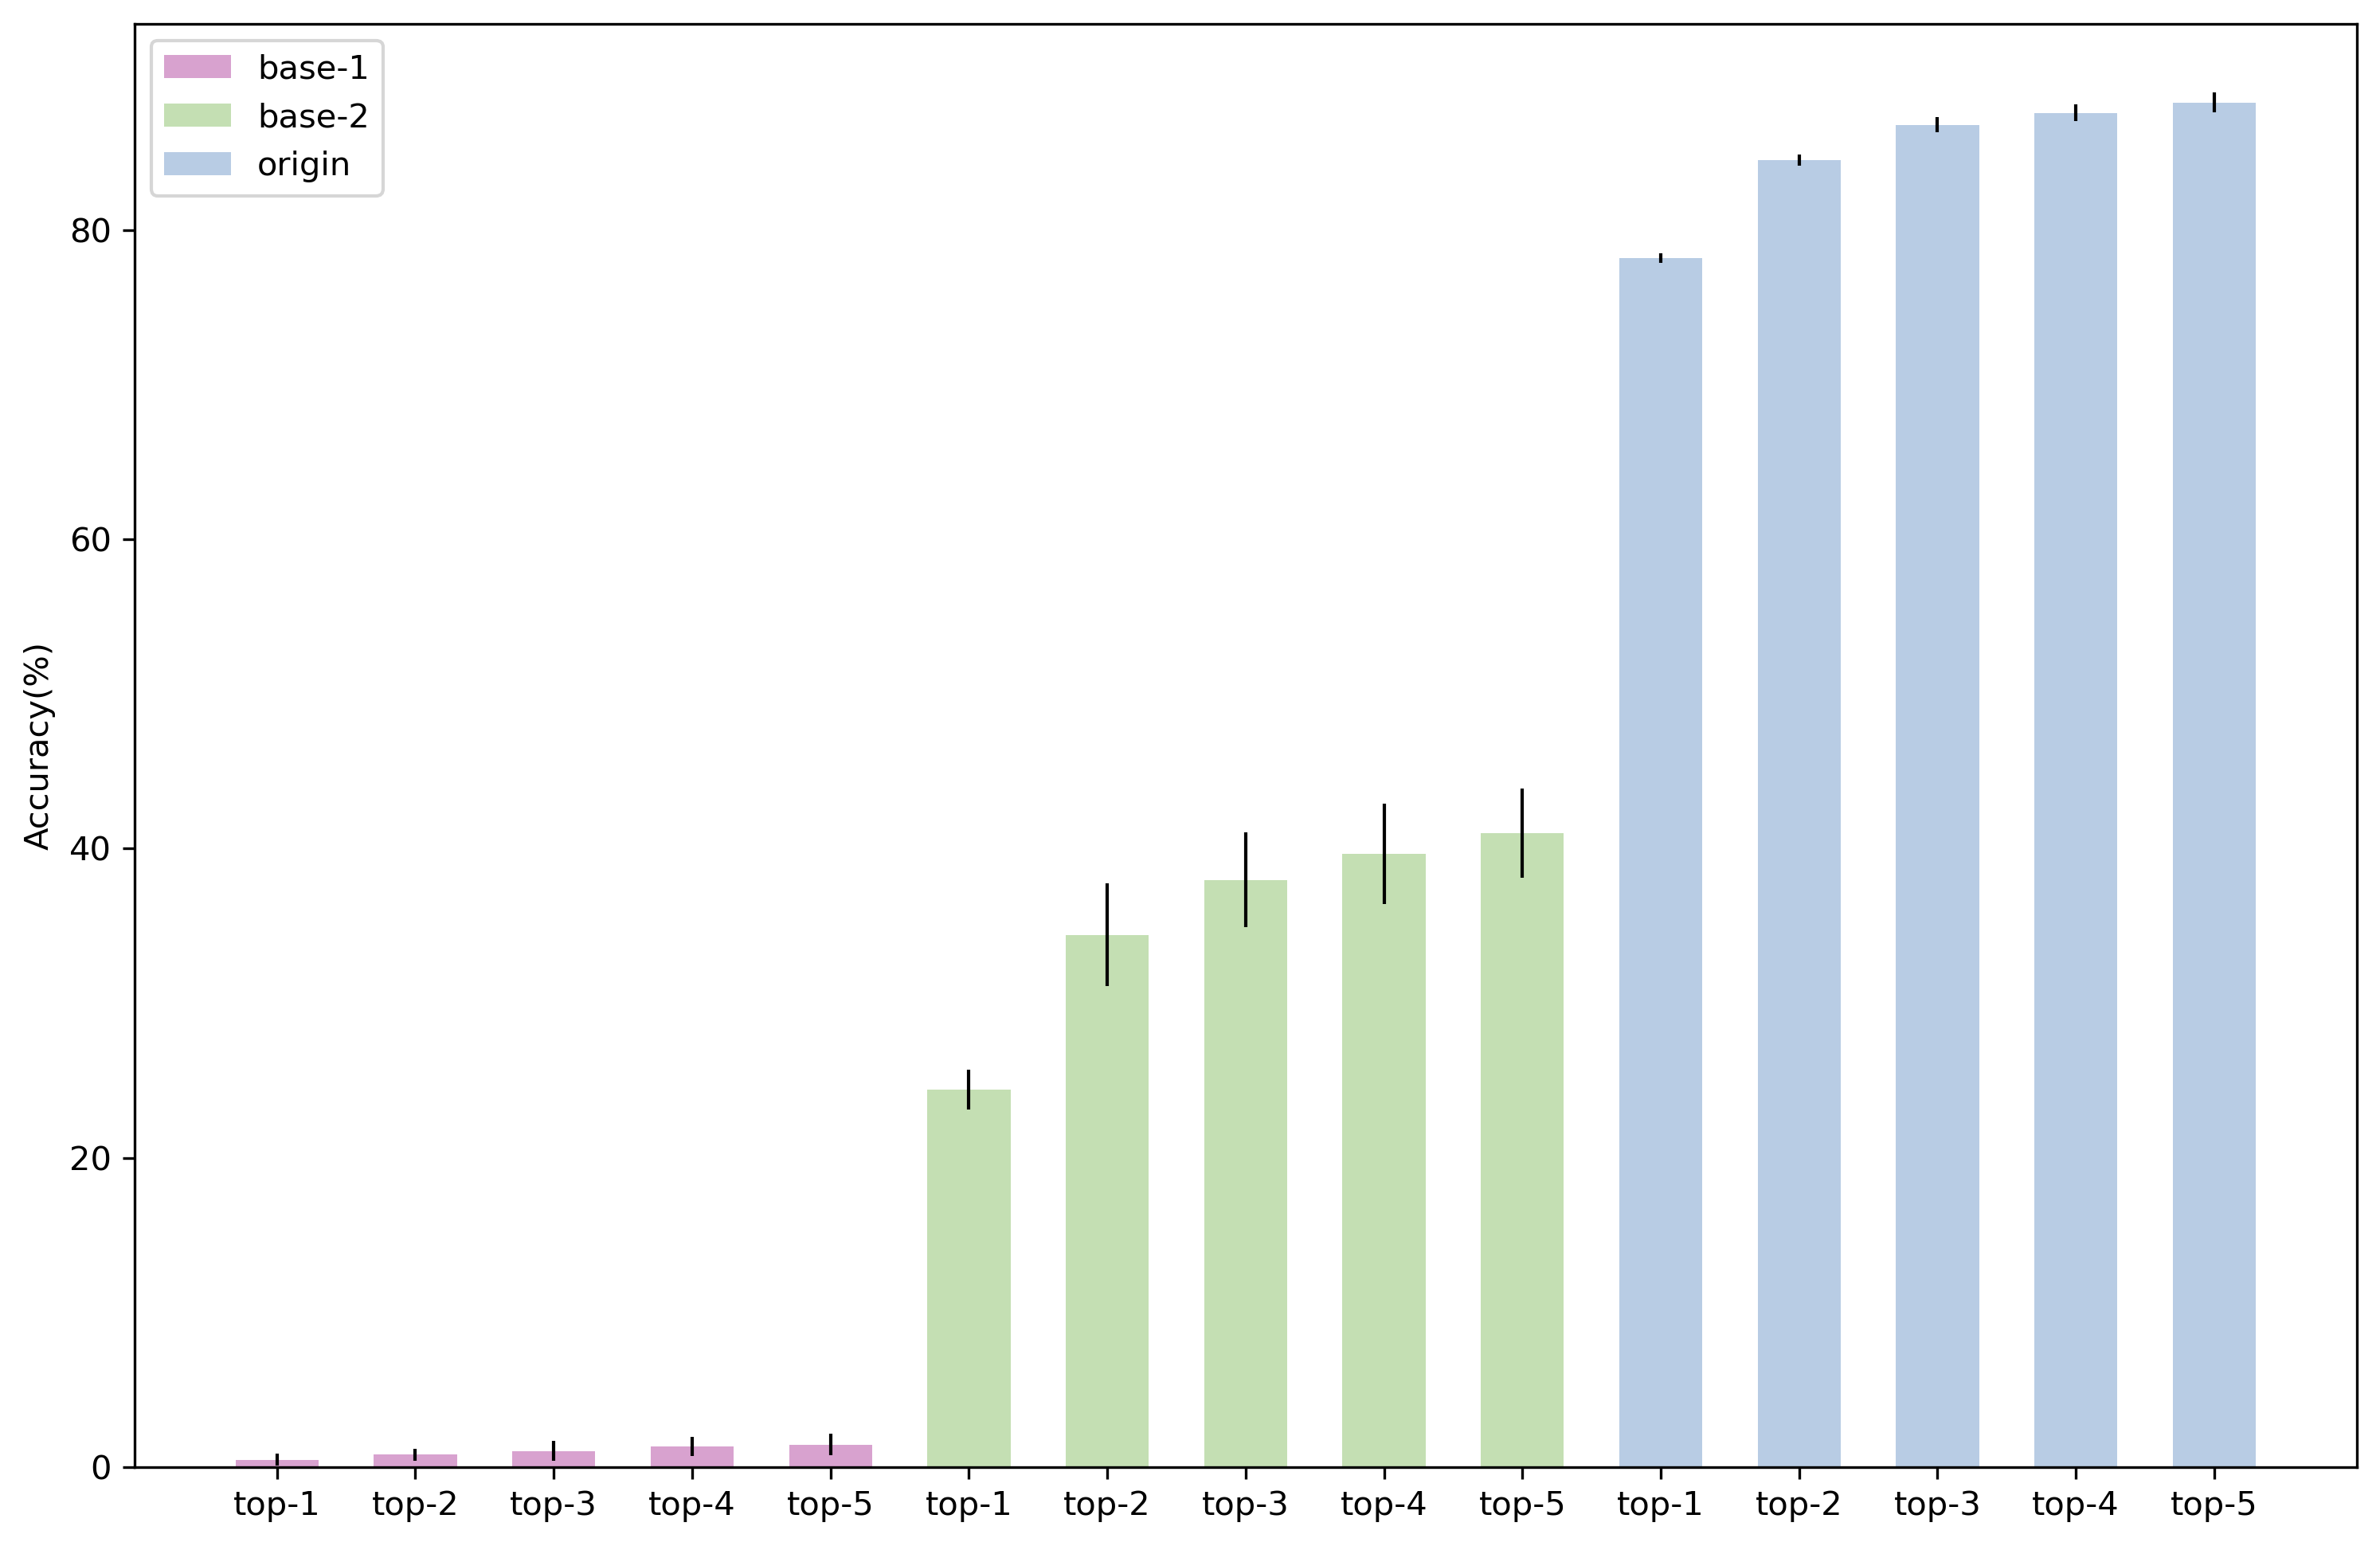

In [70]:
fig, ax = plt.subplots(figsize=(12, 8),dpi=300)

label_base1 = [f'base-1: {i}' for i in df_data_base1['index']]
label_base2 = [f'base-2: {i}' for i in df_data_base2['index']]
label_origin = [f'origin: {i}' for i in df_data_origin['index']]


plot(label_base1, 'mean', colors[0], 'error', df_data_base1, 'base-1')
plot(label_base2, 'mean', colors[1], 'error', df_data_base2, 'base-2')
plot(label_origin, 'mean', colors[2], 'error', df_data_origin, 'origin')
plt.xticks(label_base1 + label_base2 + label_origin, [f'top-{i}' for i in range(1,6)]*3)
plt.ylabel('Accuracy(%)')
plt.legend(loc='best')
plt.show()

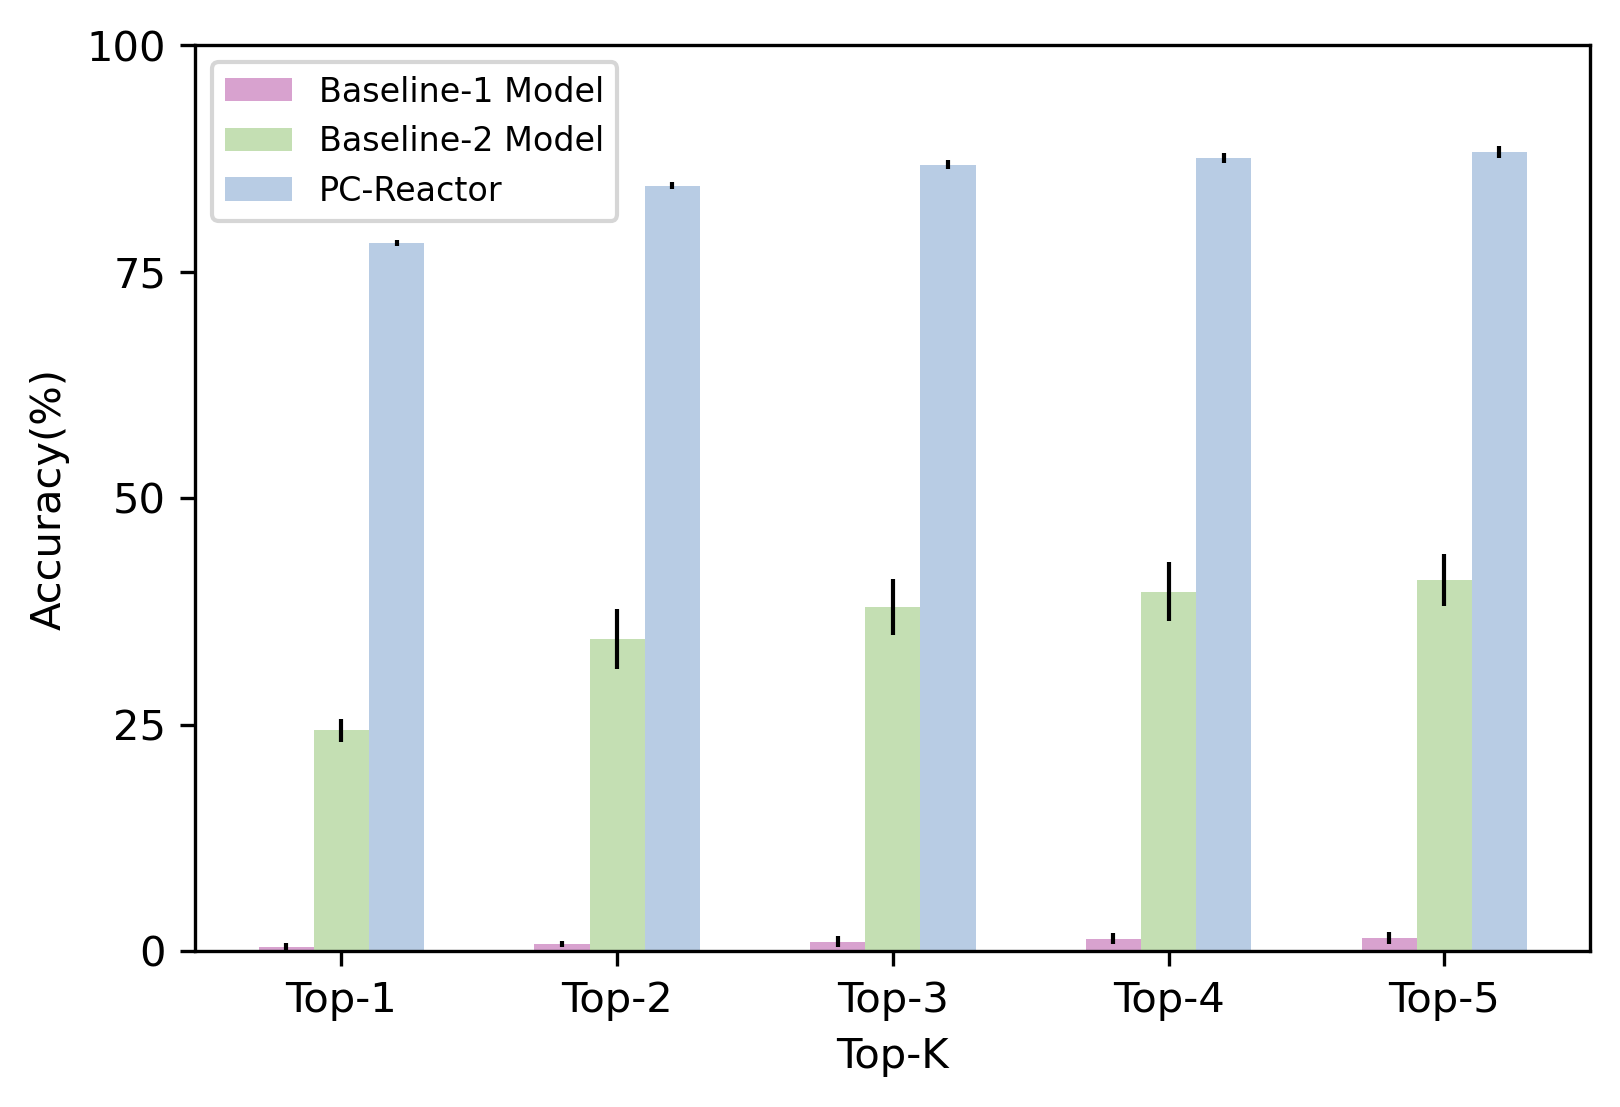

In [81]:
fig, ax = plt.subplots(dpi=300)
first = df_data_base1['mean']
second = df_data_base2['mean']
third = df_data_origin['mean']
labels = [f'Top-{i}' for i in range(1,6)]
x = np.arange(len(labels))  # x 轴刻度标签位置
width = 0.2  # 柱子的宽度

# 计算每个柱子在x轴上的位置，保证 x 轴刻度标签居中
# x - width，x， x + width 即每组数据在 x 轴上的位置
plt.bar(x - width, first, width, label='Baseline-1 Model', color=colors[0])
plt.bar(x, second, width, label='Baseline-2 Model', color=colors[1])
plt.bar(x + width, third, width, label='PC-Reactor', color=colors[2])
plt.errorbar(x - width, first, yerr=df_data_base1['error'], fmt='.',
                ecolor='k', elinewidth=1, capsize=0, ms=0)
plt.errorbar(x, second, yerr=df_data_base2['error'], fmt='.',
                ecolor='k', elinewidth=1, capsize=0, ms=0)
plt.errorbar(x + width, third, yerr=df_data_origin['error'], fmt='.',
                ecolor='k', elinewidth=1, capsize=0, ms=0)
plt.ylabel('Accuracy(%)')
plt.xlabel('Top-K')
# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels)
plt.yticks(np.linspace(0, 100, 5))
plt.legend(loc='best', fontsize=8)
plt.show()

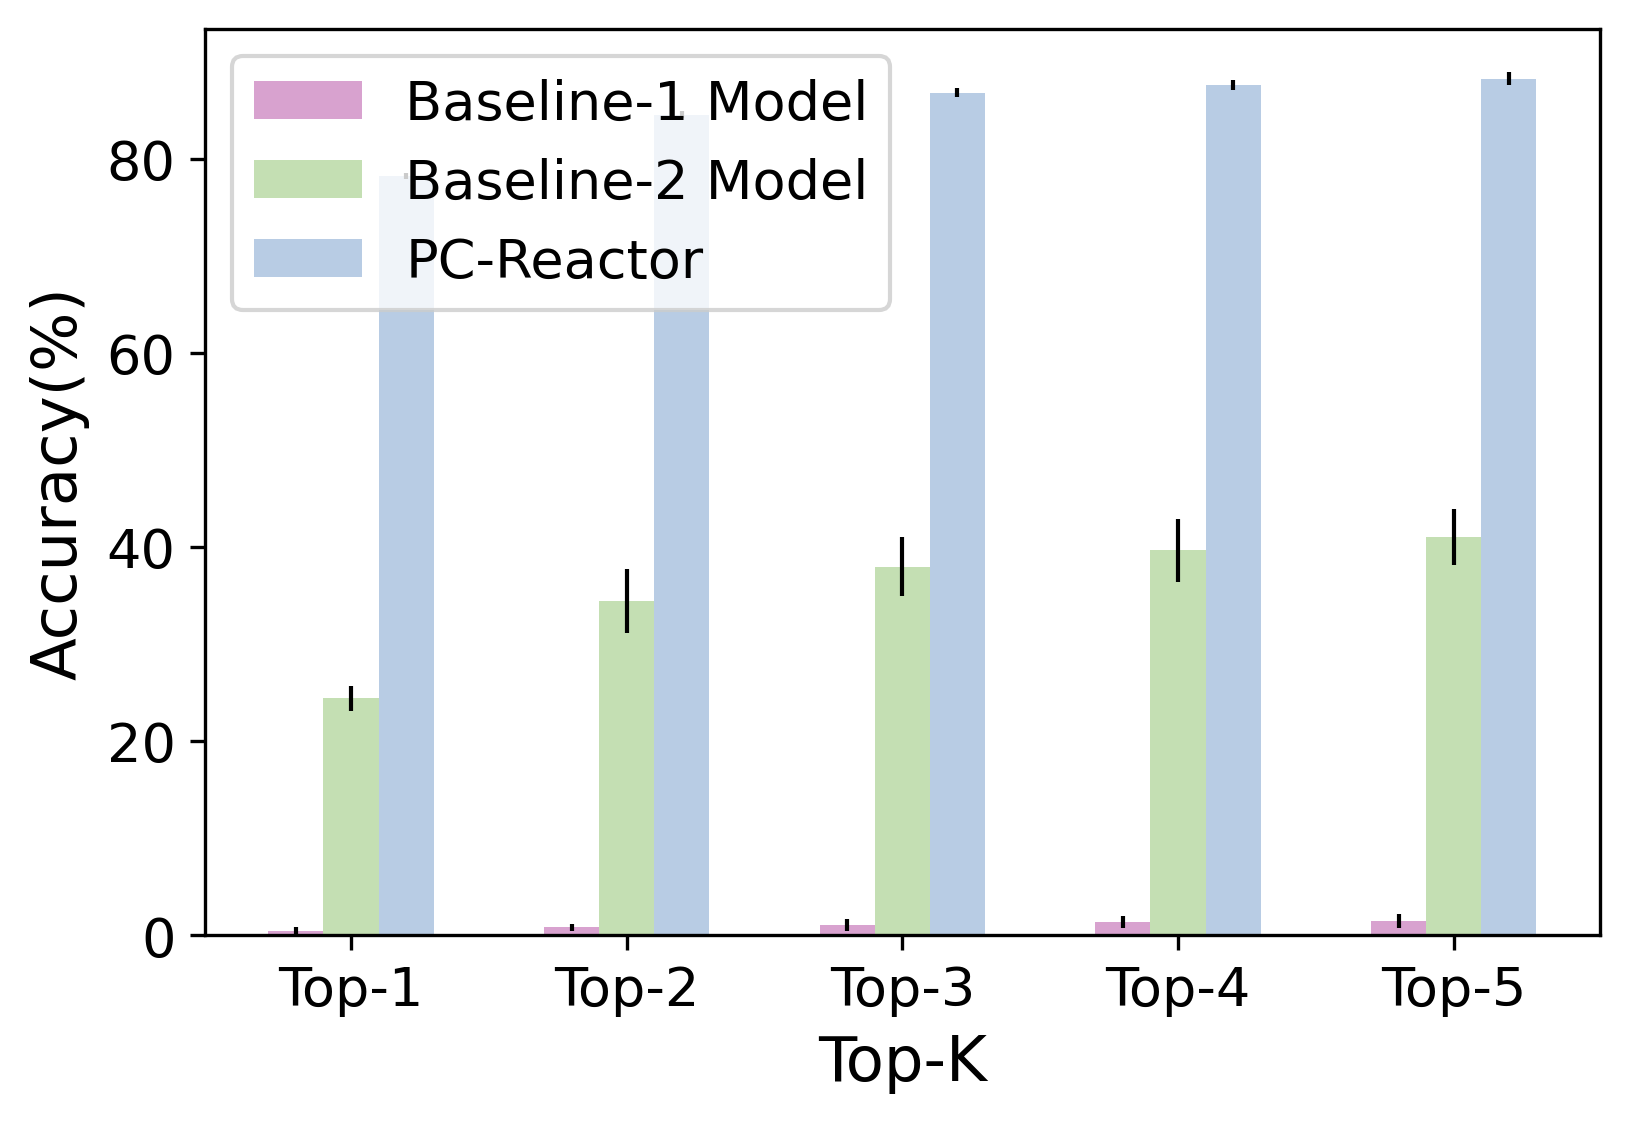

In [72]:
fig, ax = plt.subplots(dpi=300)
first = df_data_base1['mean']
second = df_data_base2['mean']
third = df_data_origin['mean']
labels = [f'Top-{i}' for i in range(1,6)]
x = np.arange(len(labels))  # x 轴刻度标签位置
width = 0.2  # 柱子的宽度
label_size = 15
tick_size = 13
label_font={
    'weight':'normal',
      'size':label_size 
}

# 计算每个柱子在x轴上的位置，保证 x 轴刻度标签居中
# x - width，x， x + width 即每组数据在 x 轴上的位置
plt.bar(x - width, first, width, label='Baseline-1 Model', color=colors[0])
plt.bar(x, second, width, label='Baseline-2 Model', color=colors[1])
plt.bar(x + width, third, width, label='PC-Reactor', color=colors[2])
plt.errorbar(x - width, first, yerr=df_data_base1['error'], fmt='.',
                ecolor='k', elinewidth=1, capsize=0, ms=0)
plt.errorbar(x, second, yerr=df_data_base2['error'], fmt='.',
                ecolor='k', elinewidth=1, capsize=0, ms=0)
plt.errorbar(x + width, third, yerr=df_data_origin['error'], fmt='.',
                ecolor='k', elinewidth=1, capsize=0, ms=0)
plt.ylabel('Accuracy(%)', fontdict=label_font)
plt.xlabel('Top-K', fontdict=label_font)
# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels,fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.legend(loc='best',fontsize=tick_size)
plt.show()

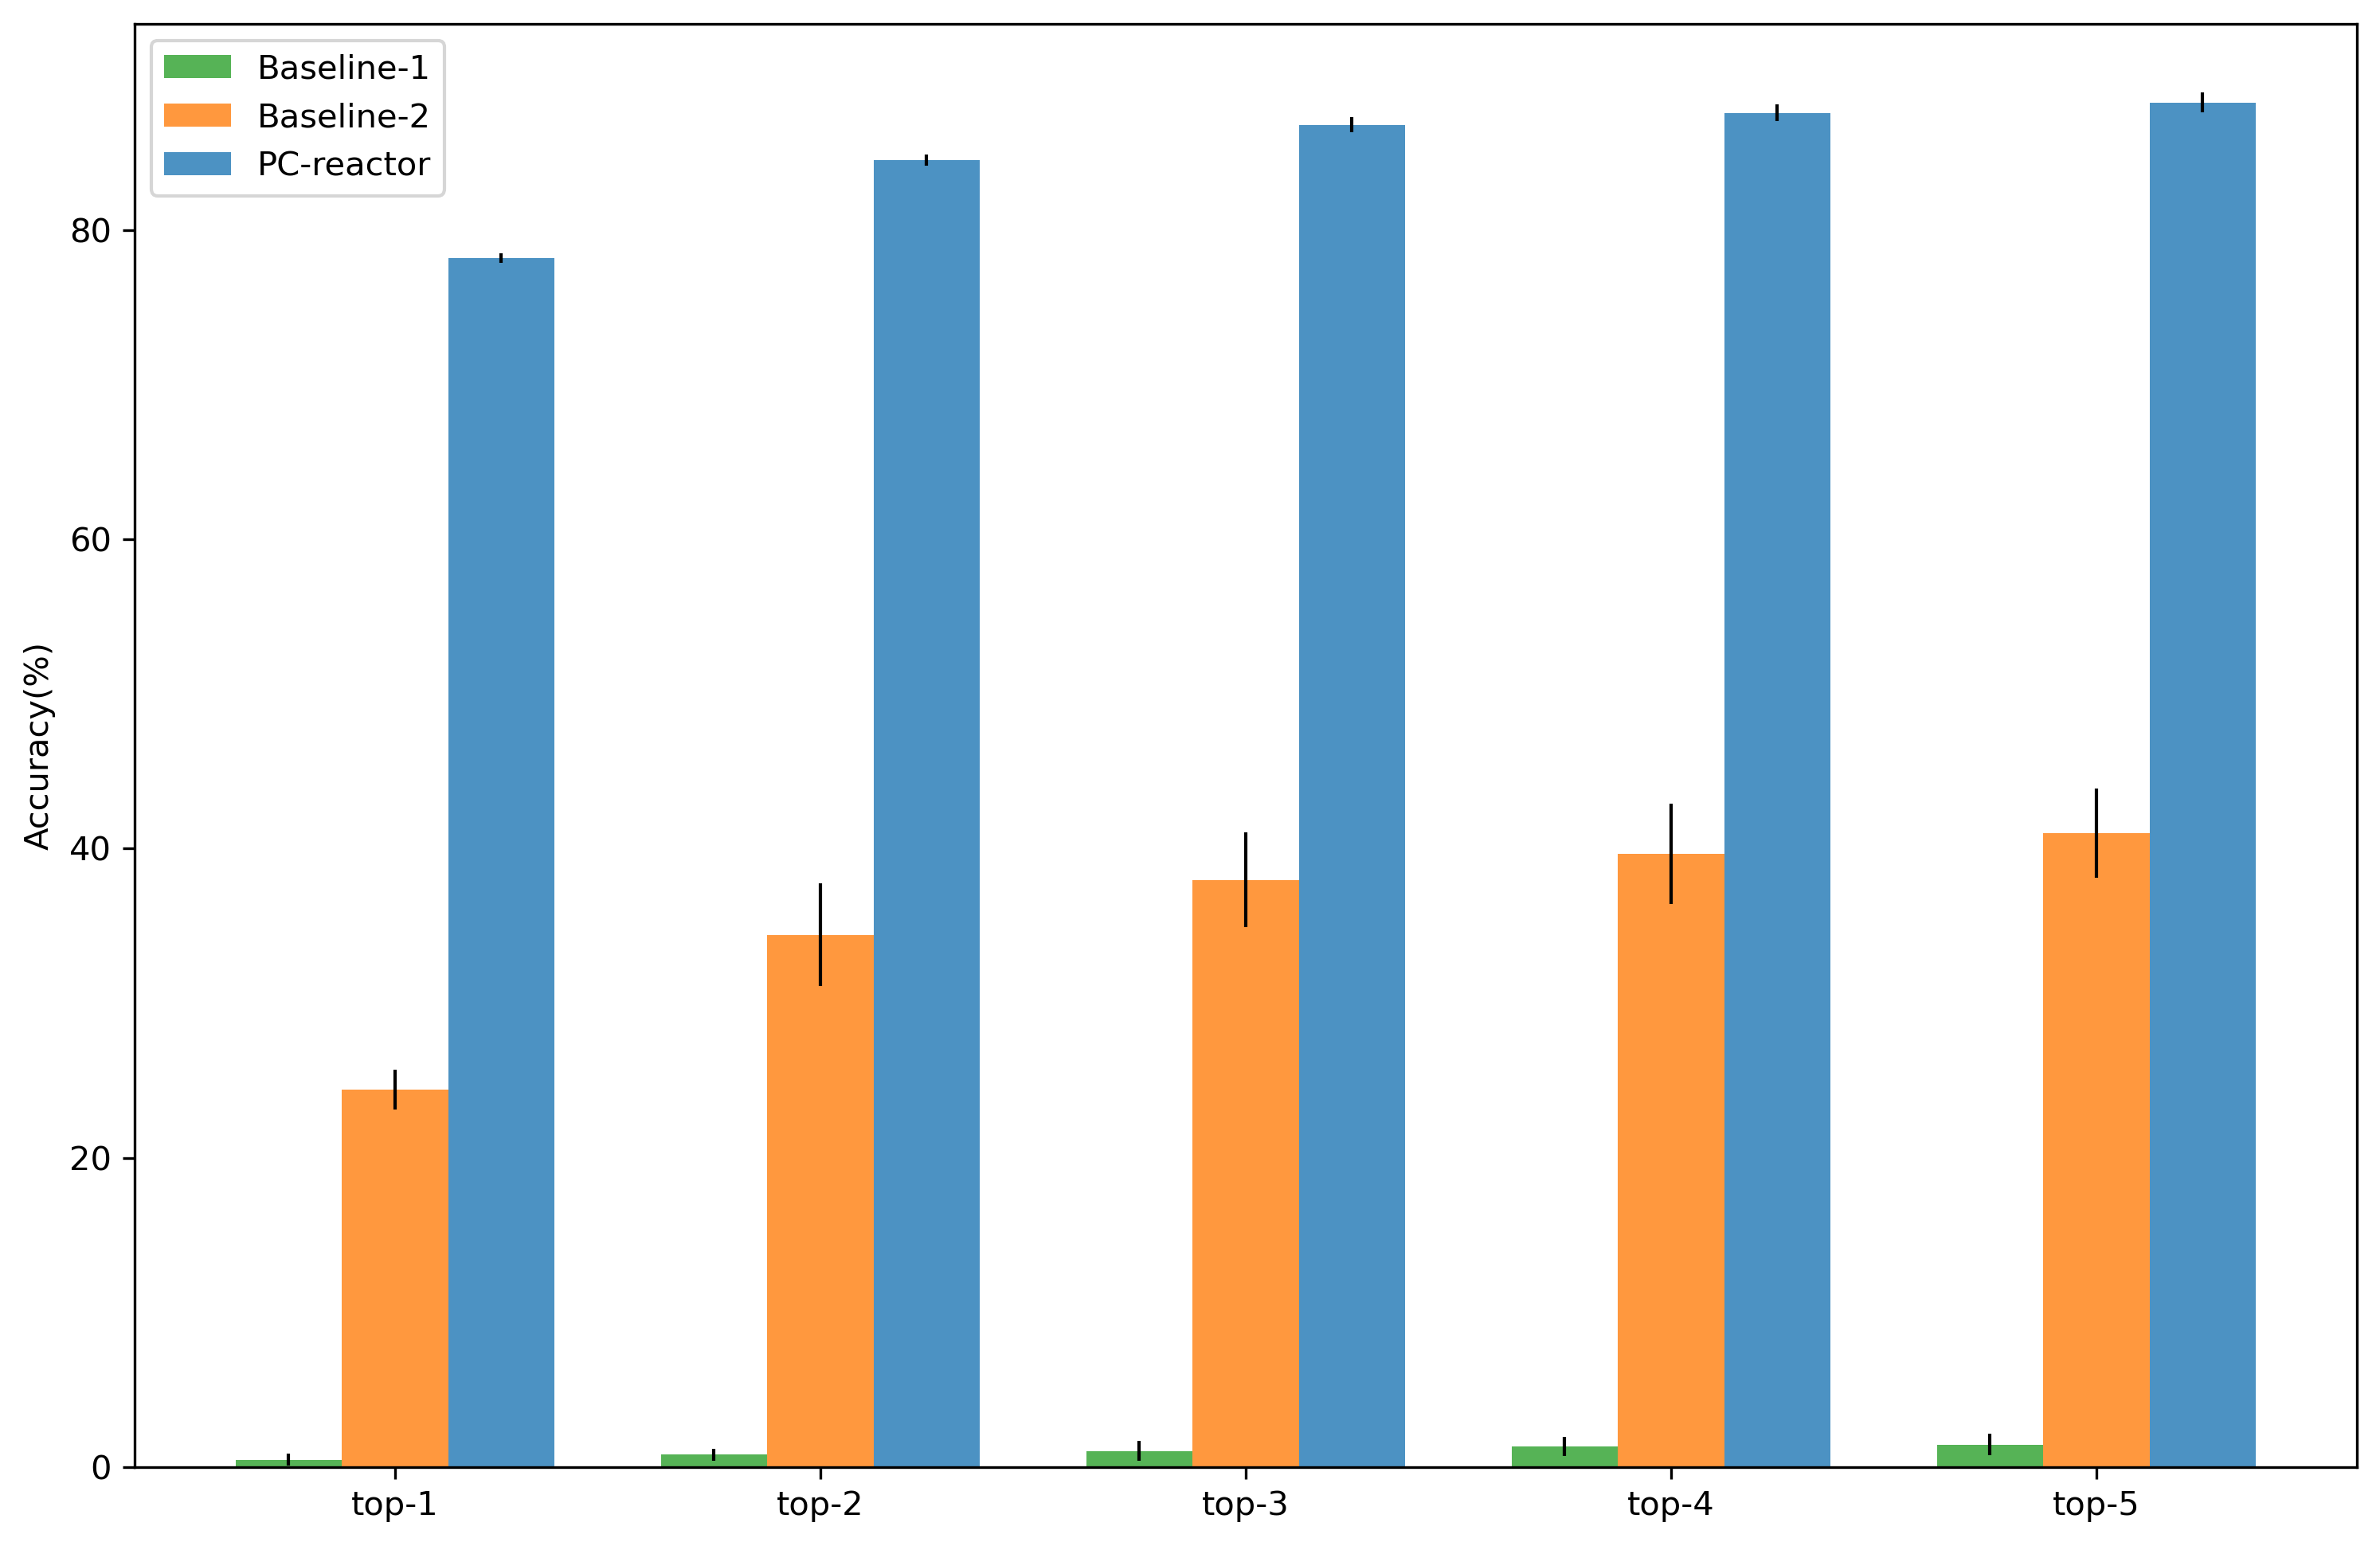

In [73]:
fig, ax = plt.subplots(figsize=(12,8),dpi=300)
first = df_data_base1['mean']
second = df_data_base2['mean']
third = df_data_origin['mean']
labels = [f'top-{i}' for i in range(1,6)]
x = np.arange(len(labels))  # x 轴刻度标签位置
width = 0.25  # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证 x 轴刻度标签居中
# x - width，x， x + width 即每组数据在 x 轴上的位置
plt.bar(x - width, first, width, label='Baseline-1', alpha=0.8, color='tab:green')
plt.bar(x, second, width, label='Baseline-2', alpha=0.8,color='tab:orange')
plt.bar(x + width, third, width, label='PC-reactor', alpha=0.8,color='tab:blue')
plt.errorbar(x - width, first, yerr=df_data_base1['error'], fmt='.',
                ecolor='k', elinewidth=1, capsize=0, ms=0)
plt.errorbar(x, second, yerr=df_data_base2['error'], fmt='.',
                ecolor='k', elinewidth=1, capsize=0, ms=0)
plt.errorbar(x + width, third, yerr=df_data_origin['error'], fmt='.',
                ecolor='k', elinewidth=1, capsize=0, ms=0)
plt.ylabel('Accuracy(%)')
# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels)
plt.legend(loc='best')
plt.show()